In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Fertilizer_Prediction.csv')

In [3]:
df.head()

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,Clayey,rice,DAP and MOP
1,28.69,96.65,178.96,6.08,4.0,4.0,4.0,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,5.01,4.0,4.0,2.0,silty clay,rice,MOP
3,25.07,95.02,192.90,5.55,2.0,2.1,3.5,sandy,Coconut,Urea and DAP
4,25.04,95.90,174.80,6.18,2.0,3.9,2.1,coastal,Coconut,Urea and MOP


In [4]:
list(df)

['Temperature',
 'Humidity',
 'Rainfall',
 'pH',
 'N',
 'P',
 'K',
 'Soil',
 'Crop',
 'Fertilizer']

In [5]:
df.shape

(200, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  200 non-null    float64
 1   Humidity     200 non-null    float64
 2   Rainfall     200 non-null    float64
 3   pH           200 non-null    float64
 4   N            200 non-null    float64
 5   P            200 non-null    float64
 6   K            200 non-null    float64
 7   Soil         200 non-null    object 
 8   Crop         200 non-null    object 
 9   Fertilizer   200 non-null    object 
dtypes: float64(7), object(3)
memory usage: 15.8+ KB


In [7]:
df.isnull().sum()

Temperature    0
Humidity       0
Rainfall       0
pH             0
N              0
P              0
K              0
Soil           0
Crop           0
Fertilizer     0
dtype: int64

In [8]:
df.describe()

,Temperature,Humidity,Rainfall,pH,N,P,K
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,25.557200,88.563150,206.073850,6.211300,3.115500,3.130500,2.956000
std,2.544626,6.636224,43.954794,0.622228,0.910193,0.929213,0.721364
min,20.050000,80.120000,131.090000,5.010000,2.000000,2.000000,1.900000
25%,23.820000,82.225000,172.372500,5.760000,2.200000,2.075000,2.100000
50%,25.975000,87.495000,203.435000,6.125000,2.500000,3.900000,3.000000
75%,27.310000,94.930000,233.115000,6.440000,4.000000,4.000000,3.500000
max,29.870000,99.980000,298.560000,7.870000,4.200000,4.000000,4.000000


In [9]:
print("There are seven class in Fertilizer: ", df['Fertilizer'].unique())

There are seven class in Fertilizer:  ['DAP and MOP' 'Good NPK' 'MOP' 'Urea and DAP' 'Urea and MOP' 'Urea '
 'DAP']


<Axes: xlabel='count', ylabel='Fertilizer'>

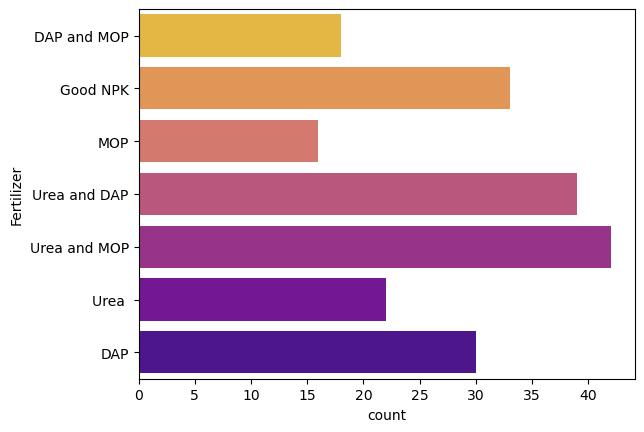

In [10]:
sns.countplot(y='Fertilizer',data=df,palette="plasma_r")

In [11]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Distogram')
    sns.distplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with target variable')
    sns.boxplot(y = x,x = df['Fertilizer'])

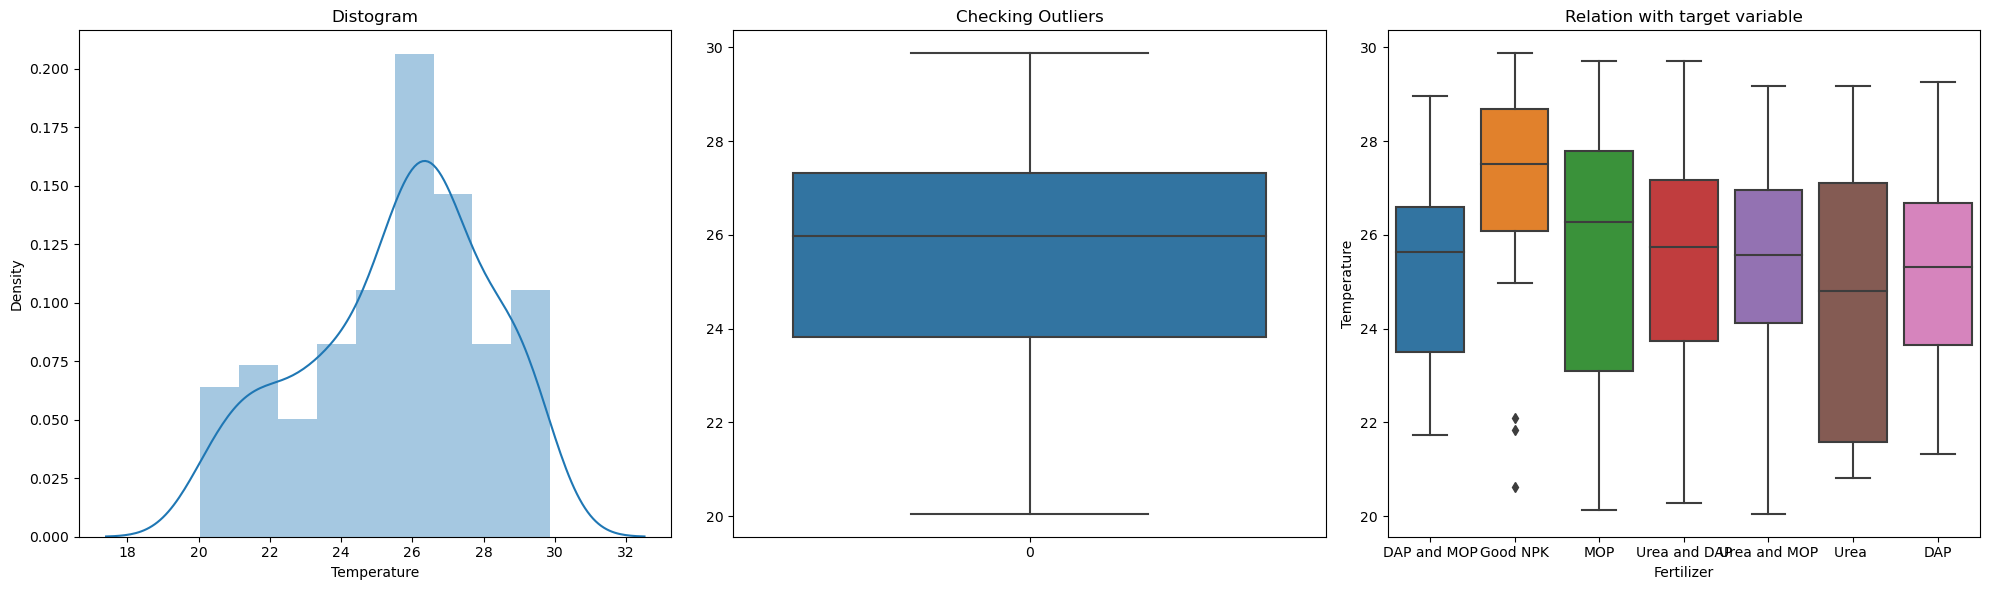

In [12]:
plot_conti(df['Temperature'])

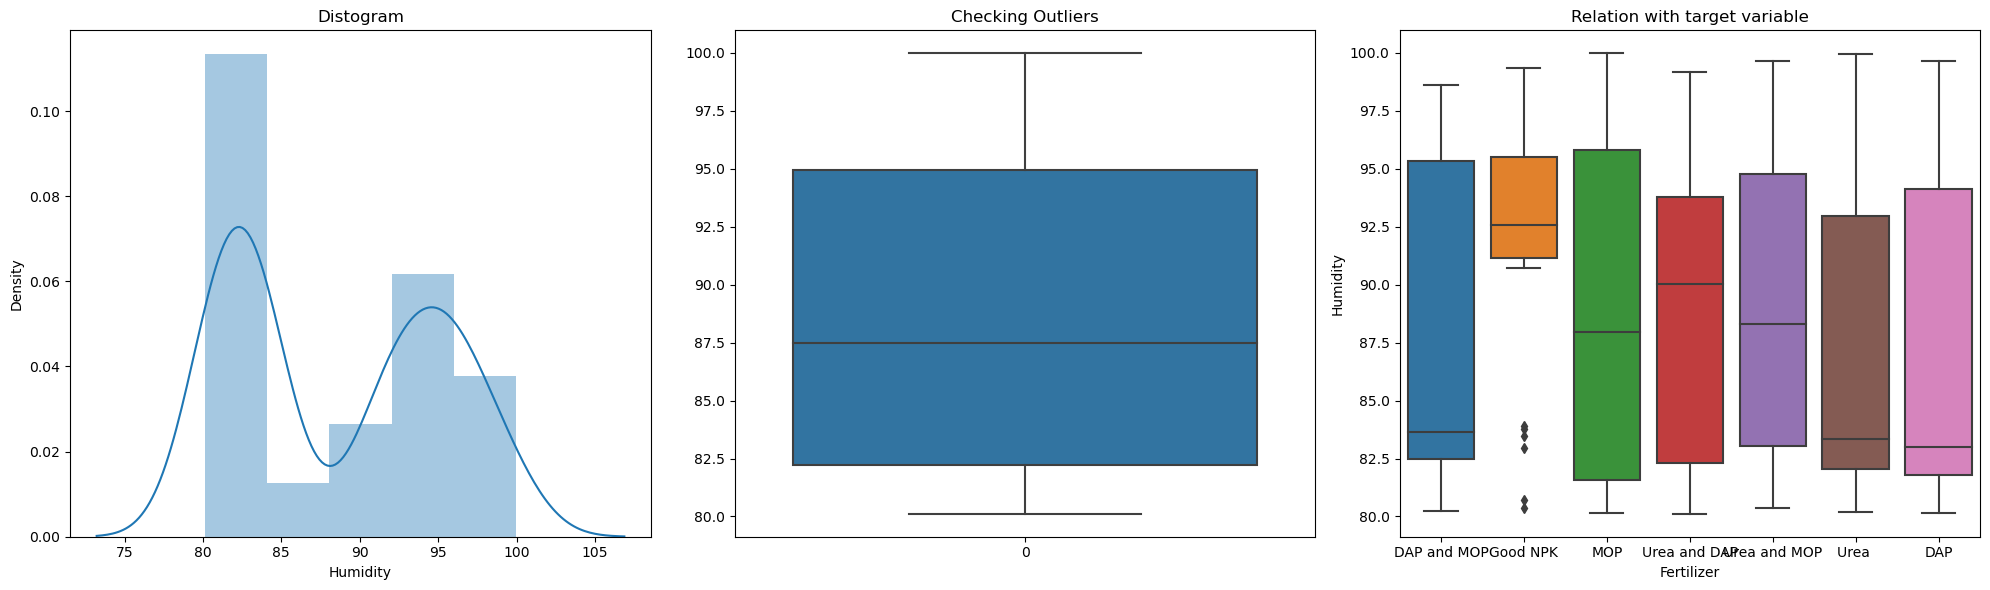

In [13]:
plot_conti(df['Humidity'])

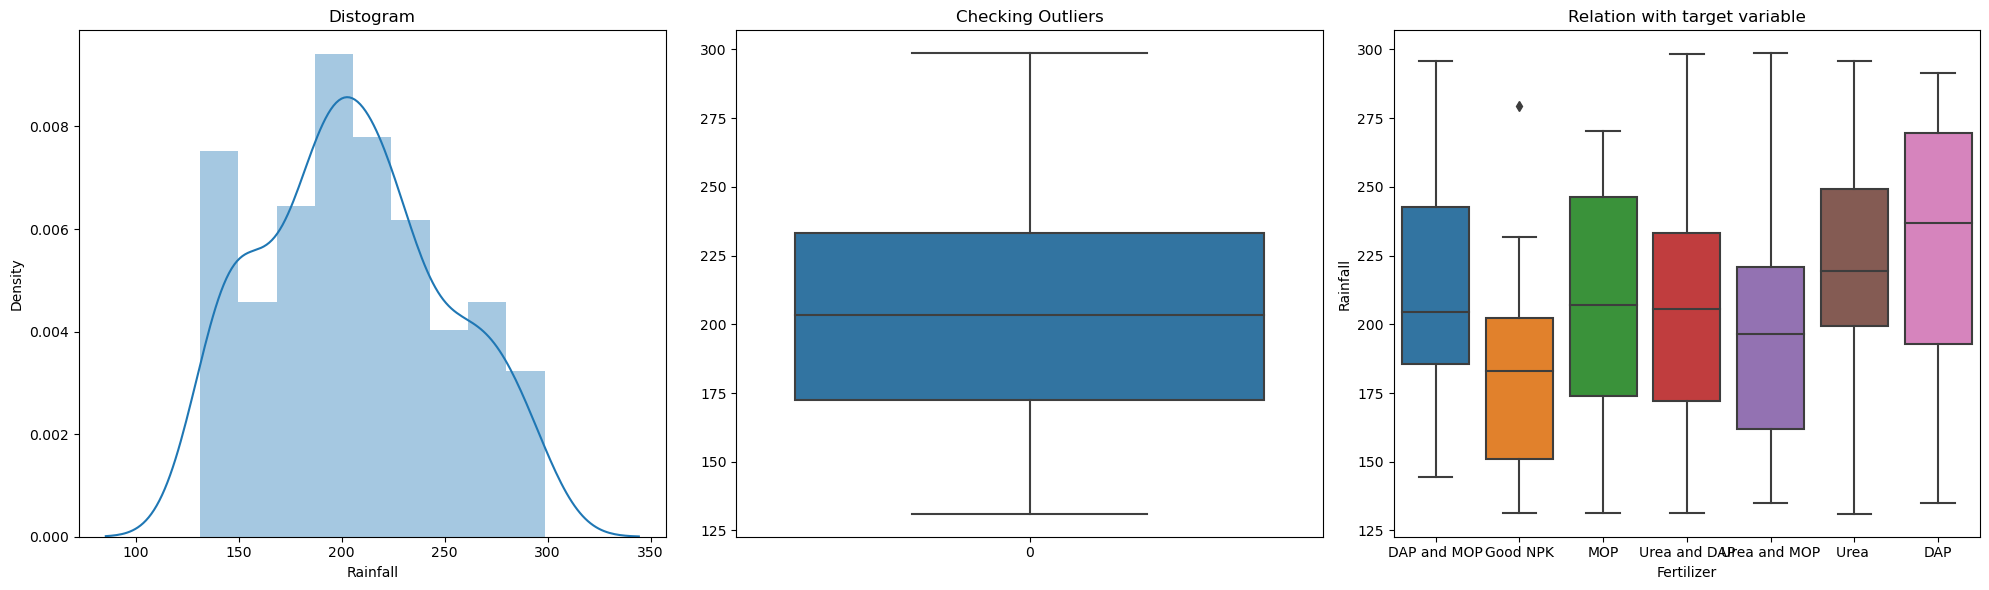

In [14]:
plot_conti(df['Rainfall'])

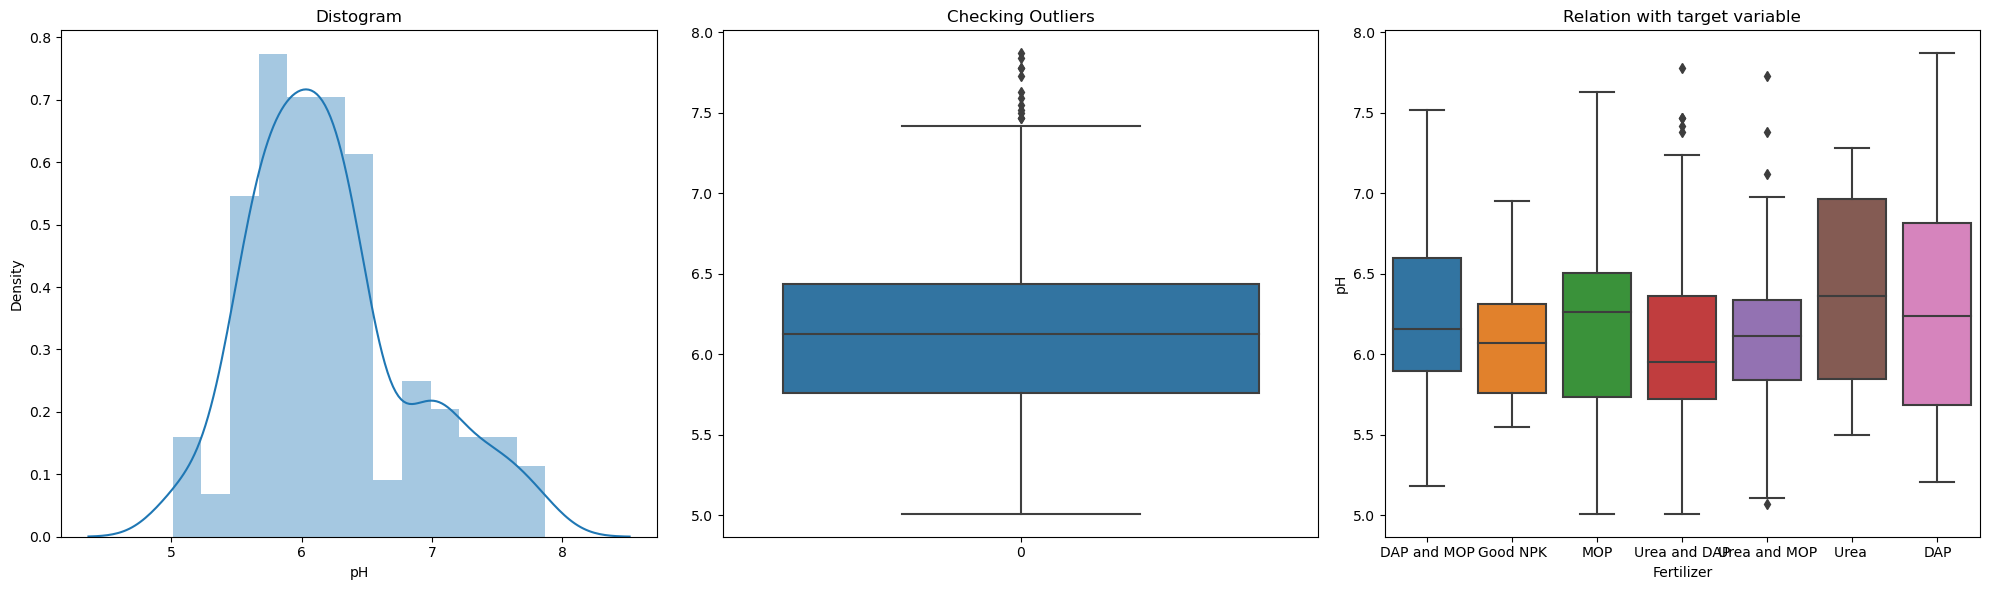

In [15]:
plot_conti(df['pH'])

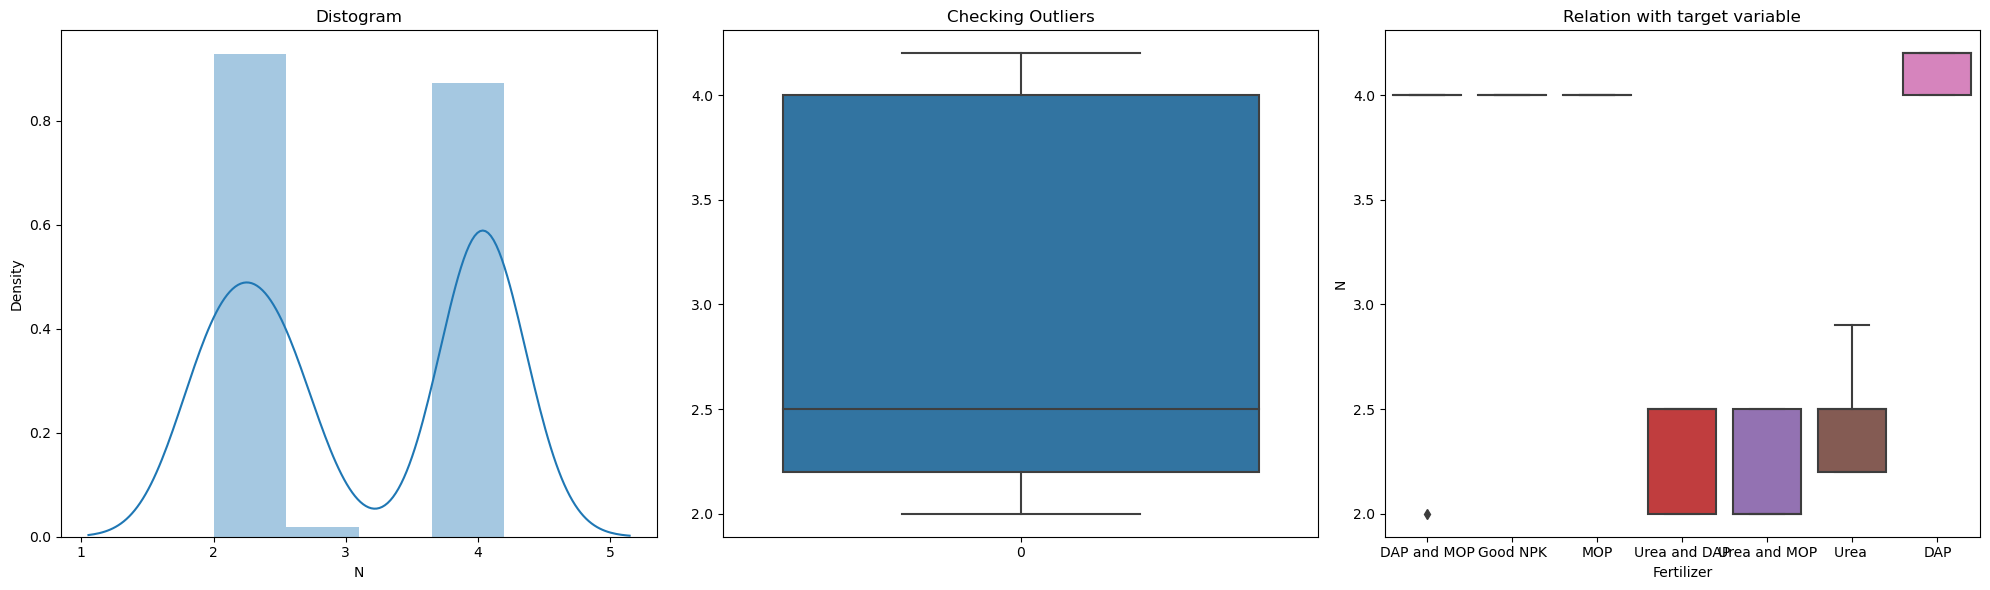

In [16]:
plot_conti(df['N'])

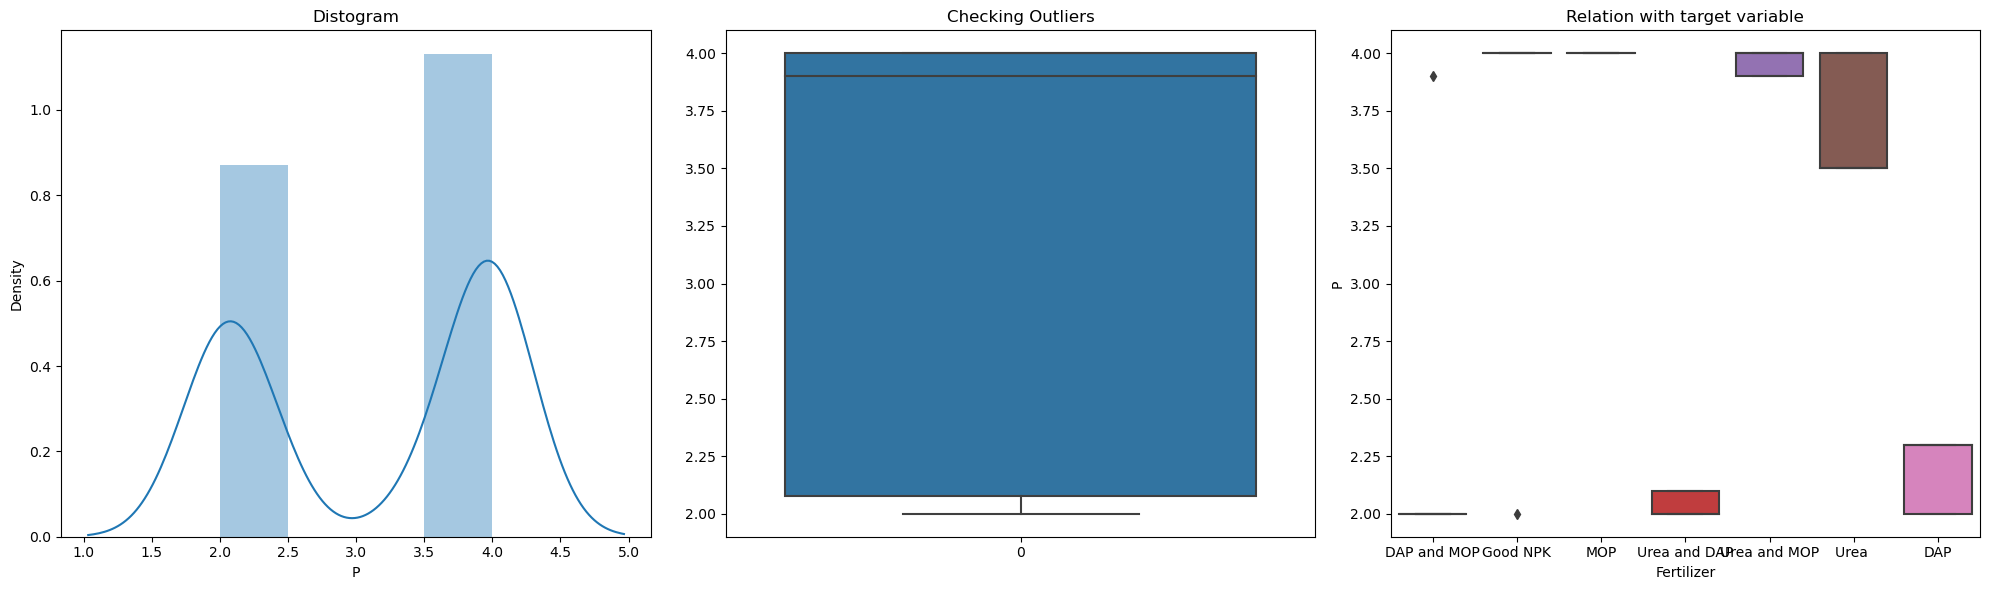

In [17]:
plot_conti(df['P'])

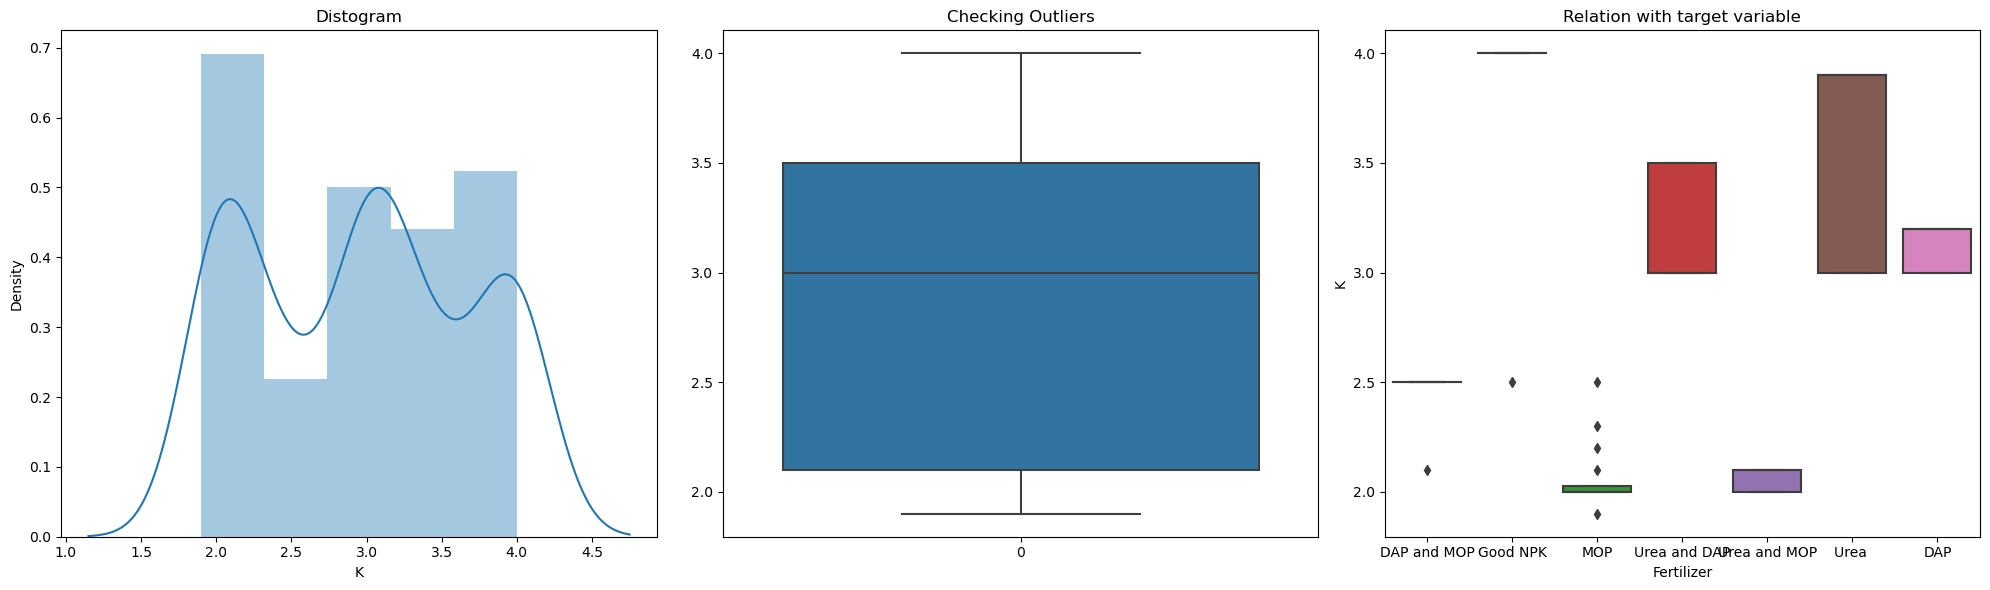

In [18]:
plot_conti(df['K'])

In [19]:
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x=x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer'], ax=axes[1])

In [20]:
print("Soil : ", df['Soil'].unique())

Soil :  ['Clayey' 'laterite' 'silty clay' 'sandy' 'coastal' 'clay loam' 'alluvial']


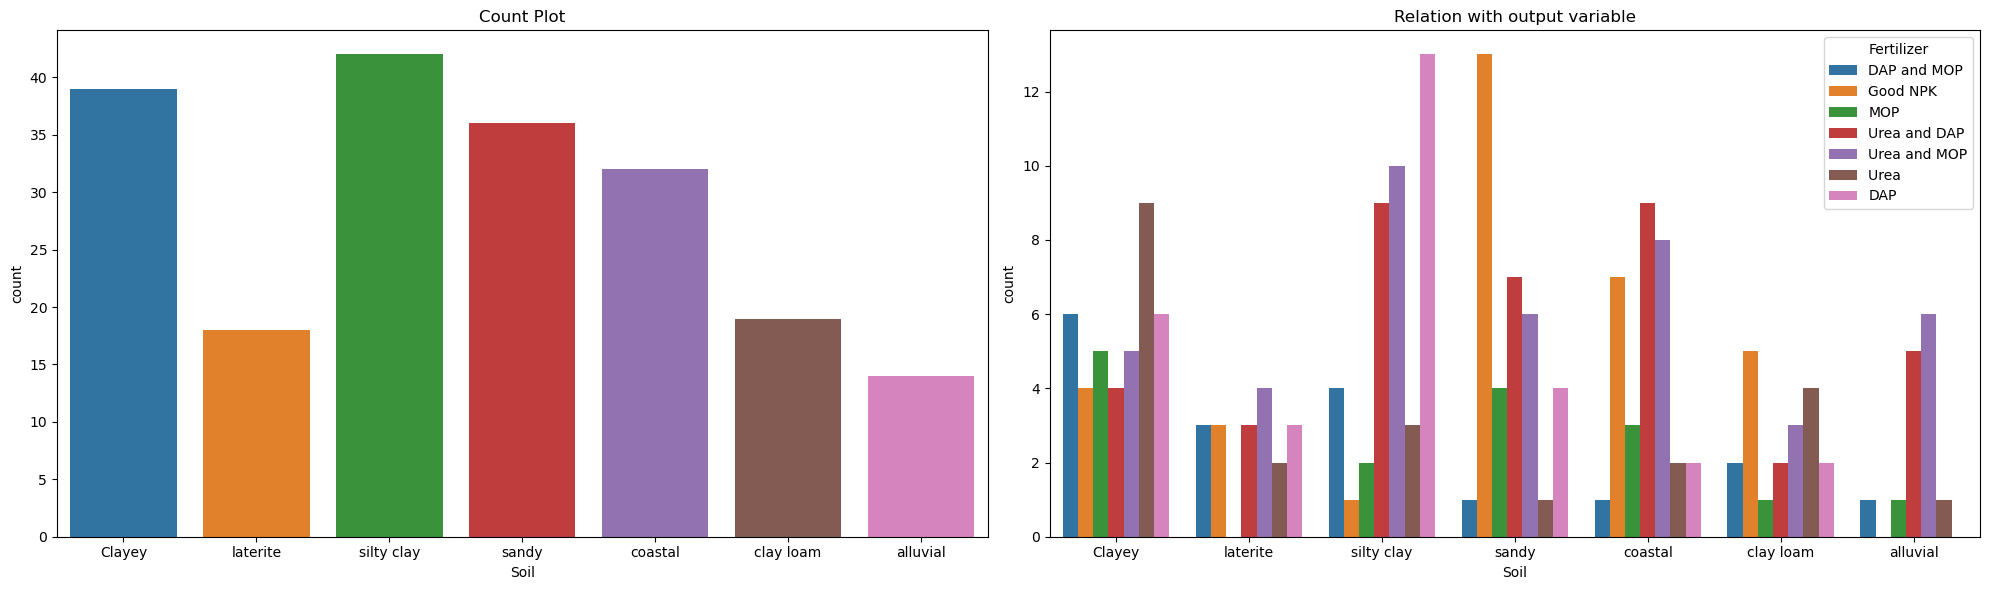

In [21]:
plot_cato(df['Soil'])

In [22]:
print("Crop: ", df['Crop'].unique())

Crop:  ['rice' 'Coconut']


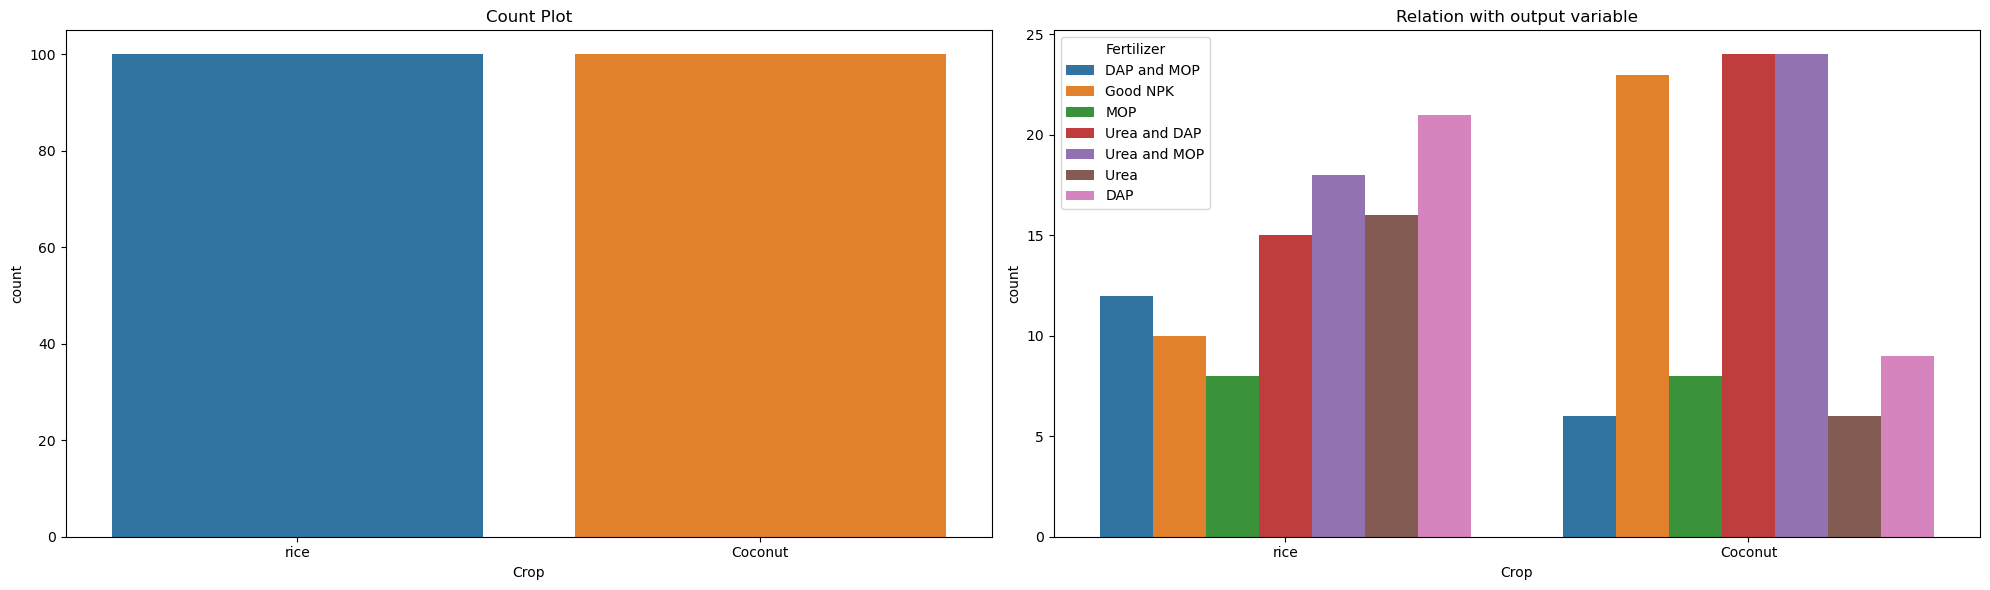

In [23]:
plot_cato(df['Crop'])

In [24]:
categorical_features = ['Soil' ]

In [25]:
numerical_features = ['Temperature','Humidity','Rainfall','pH','N','P','K'] 

In [26]:
# Define preprocessing steps
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

In [27]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

In [28]:
# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [29]:
X = df.drop([ 'Fertilizer'], axis=1)  
y = df[['Fertilizer']]  
y2= df[['Crop']]

In [30]:
print('The shape of feature set, X is', X.shape)
print('The shape of target, y is', y.shape)
print('The shape of 2nd target, y2 is', y2.shape)

The shape of feature set, X is (200, 9)
The shape of target, y is (200, 1)
The shape of 2nd target, y2 is (200, 1)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2,random_state=42)

In [32]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Soil']),
                                                 ('num', StandardScaler(),
                                                  ['Temperature', 'Humidity',
                                                   'Rainfall', 'pH', 'N', 'P',
                                                   'K'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [33]:
y_pred = pipeline.predict(X_test)
y_pred

array(['Urea and MOP', 'Urea ', 'Urea and DAP', 'Good NPK',
       'Urea and MOP', 'Urea and MOP', 'Urea and MOP', 'Good NPK',
       'Urea and DAP', 'DAP', 'Good NPK', 'DAP', 'Urea and MOP', 'MOP',
       'Urea and MOP', 'DAP', 'DAP and MOP', 'Good NPK', 'Urea and MOP',
       'Urea ', 'Urea and DAP', 'DAP', 'Good NPK', 'MOP', 'DAP and MOP',
       'DAP and MOP', 'Good NPK', 'Urea and DAP', 'Good NPK', 'DAP',
       'Urea ', 'Urea and DAP', 'Urea ', 'Urea and MOP', 'DAP',
       'Good NPK', 'Urea and MOP', 'DAP and MOP', 'Urea and MOP', 'Urea '],
      dtype=object)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [35]:
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [36]:
pipeline2.fit(X_train2, y_train2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Soil']),
                                                 ('num', StandardScaler(),
                                                  ['Temperature', 'Humidity',
                                                   'Rainfall', 'pH', 'N', 'P',
                                                   'K'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [37]:
y_pred2 = pipeline2.predict(X_test2)
y_pred2

array(['rice', 'rice', 'rice', 'Coconut', 'rice', 'Coconut', 'rice',
       'Coconut', 'Coconut', 'rice', 'Coconut', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'Coconut', 'Coconut', 'Coconut', 'rice',
       'rice', 'Coconut', 'Coconut', 'rice', 'Coconut', 'Coconut',
       'Coconut', 'Coconut', 'rice', 'rice', 'Coconut', 'rice', 'rice',
       'rice', 'Coconut', 'rice', 'Coconut', 'rice', 'rice'], dtype=object)

In [38]:
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.925


In [39]:
# Save the pipeline
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)


In [40]:
with open('pipeline2.pkl', 'wb') as file:
    pickle.dump(pipeline2, file)

In [41]:
X3 = df[[ 'pH', 'N', 'P', 'K' ]]

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [43]:
kmeans_model = kmeans.fit(X3)

In [44]:
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_model, f)